In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from scipy.optimize import fmin_slsqp
from msmr_tool.utilities import preprocessing
from msmr_tool.utilities import msmr_model

sns.set_context("poster")

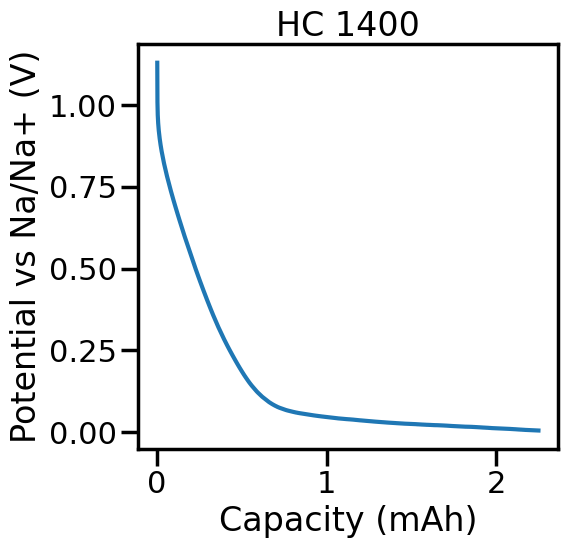

In [5]:
filepath = 'data/HC_1400_cleaned.csv'
cycler = 'BioLogic'
cycle_num = 3
test1 = preprocessing.load_experiment_data(filepath, cycler, cycle_num, charge=True)

plt.figure(figsize=(6,6))
plt.plot(test1[0], test1[1])
plt.ylabel('Potential vs Na/Na+ (V)')
plt.xlabel('Capacity (mAh)')
plt.title('HC 1400')

plt.tight_layout()

In [9]:
current_density = 15 # uA/mg
AM_1400 = 8.62 # active material mass in mg
cc_1400 = current_density * 1E-3 * AM_1400 # constant current value in mA

print(cc_1400)

0.12929999999999997


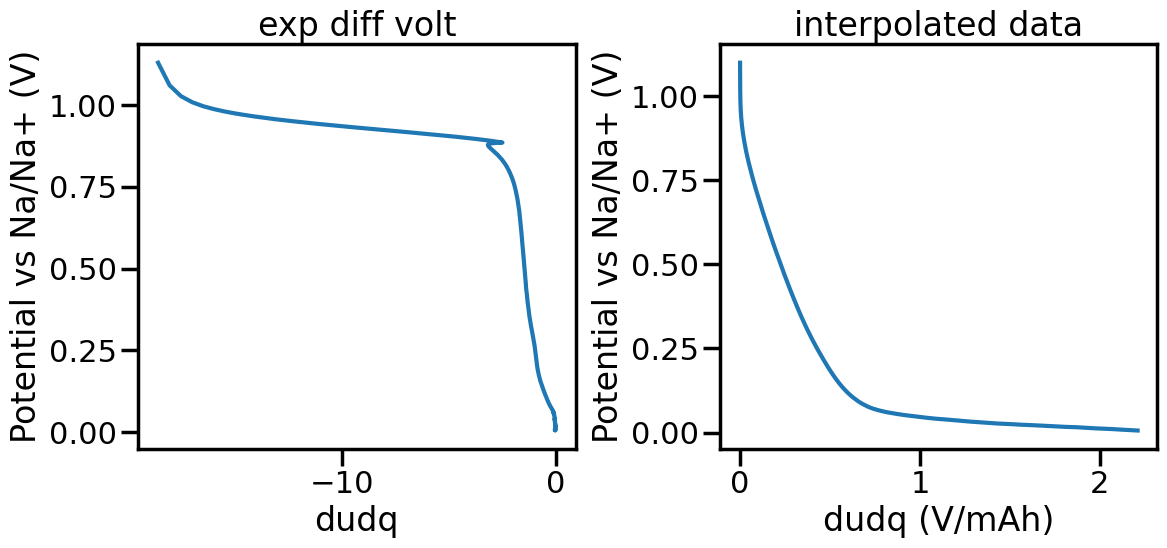

In [10]:
exp_capacity = test1[0]
exp_voltage = test1[1]

current_density = 15 # uA/mg
AM_1400 = 8.62 # active material mass in mg
cc_1400 = current_density * 1E-3 * AM_1400 # constant current value in mA

v_range = np.linspace(6E-3, 1.1, 1000)

test2 = preprocessing.clean_exp_data(exp_voltage, exp_capacity, 
                       constant_current = cc_1400, 
                       timestep = 10, 
                       interp_voltage_range = v_range, 
                       sf_window_length = 99)
# 0: dudq
# 1: cap interp
# 2: diff volt interp

fig, ax = plt.subplots(1,2, figsize = (12,6), tight_layout = True)
#fig.suptitle('Cell 1 Experimental Data')

ax[0].set_title('exp diff volt')
ax[0].set_xlabel('dudq')
ax[0].set_ylabel('Potential vs Na/Na+ (V)')
ax[0].plot(test2[0], exp_voltage)
#ax[0].plot(Q_1400_interp, v_range, '--', label = 'Interpolated')
#ax[0].legend()

ax[1].set_title('interpolated data')
ax[1].set_xlabel('dudq (V/mAh)')
ax[1].set_ylabel('Potential vs Na/Na+ (V)')
ax[1].plot(test2[1], v_range)

plt.show()

In [8]:
ref = msmr_model.select_electrode('Hard Carbon (Na)')
ref.head()

,Uj0,Xj,wj
j,,,
1,0.08,0.50,0.7
2,0.20,0.15,3.0
3,0.57,0.35,5.0
